In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import model.vae_model as model_vae
from model.vae_model import VAE
from model.vae_model import train

In [0]:
import torch
import torch.nn as nn

from torch.nn import MSELoss
from torch.utils.data import DataLoader
from torch.distributions.normal import Normal
from torch.optim import Adam, SGD

import torchvision.transforms as transforms

from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

import numpy as np

from PIL import Image

In [0]:
size_image = 128
device = torch.device('cuda:0')
path = r'drive/My Drive/VAE64/'

In [0]:
to_img = transforms.ToPILImage()

In [0]:
transform = transforms.Compose([transforms.Resize(size_image),
                                transforms.CenterCrop(size_image),
                                transforms.ToTensor()])

wolfs = DataLoader(ImageFolder(r'drive/My Drive/volf/', 
                               transform=transforms.Compose([
                                   transforms.Resize(size_image),
                                   transforms.CenterCrop(size_image),
                                   transforms.ToTensor()
                               ]),
                              ),
                  batch_size=260,
                  shuffle=True,
                  num_workers=4)

In [0]:
vae64 = torch.load(f'{path}2850.direct.by.Sevostyanihin')
# vae32 = VAE(32, device).to(device)
# vae32

In [0]:
optimizer = Adam(vae64.parameters(), lr=5e-6)
# optimizer = SGD(vae.parameters(), lr=5e-4,  momentum=0.5, nesterov=True)
loss_mse = MSELoss()

In [0]:
img = 'drive/My Drive/volf/Volf/977-1940.jpg'
# plt.imshow(img)

In [0]:
def show_img(vae, img, to_img):


    fig, axes = plt.subplots(1, 2)

    img = Image.open(img)
    img = transform(img)

    img_ = to_img(img)
    axes[0].imshow(img_)
    axes[0].set_title('До')

    img = img.to(device)
    img, _, _ = vae(img.view(1, 3, size_image, size_image))
    img.shape
    a = img.view(3, size_image, size_image).to('cpu')
    to_img = transforms.ToPILImage()
    a = to_img(a)

    axes[1].imshow(a)
    axes[1].set_title('После')

    fig.set_figwidth(12)    #  ширина и
    fig.set_figheight(6)    #  высота "Figure"

    plt.show()

In [31]:
vae128 = VAE(128, device).to(device)
vae128

VAE(
  (encoder): Encoder(
    (main): Sequential(
      (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout2d(p=0.25, inplace=False)
      (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): LeakyReLU(negative_slope=0.01)
      (7): Dropout2d(p=0.25, inplace=False)
      (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): LeakyReLU(negative_slope=0.01)
      (11): Dropout2d(p=0.25, inplace=False)
      (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (14): LeakyRe

In [0]:
vae128.encoder.main[0] = vae64.encoder.main[0] 

In [29]:
vae64

VAE(
  (encoder): Encoder(
    (main): Sequential(
      (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout2d(p=0.25, inplace=False)
      (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): LeakyReLU(negative_slope=0.01)
      (7): Dropout2d(p=0.25, inplace=False)
      (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): LeakyReLU(negative_slope=0.01)
      (11): Dropout2d(p=0.25, inplace=False)
    )
    (mu): Linear(in_features=2048, out_features=200, bias=True)
    (log_var): Linear(in_features=2048, out_features=200, bias=True)
  )
  (decoder): Decoder(
    (first): Linear(in_f

In [0]:
for param in vae64.parameters():
    param.requires_grad = True

In [0]:
path = r'drive/My Drive/VAE64/'

In [0]:
def train(vae, optimizer, wolfs, path, device, epochs):
    for epoch in range(vae.epoch, epochs + 1):

        print(epoch)

        for imgs, _ in wolfs:

            imgs = imgs.float().to(device)

            optimizer.zero_grad()

            y_pred, mu, log_var = vae(imgs)

            loss = loss_mse(y_pred, imgs)

            loss.backward()
            optimizer.step()

        vae.epoch += 1
        print(loss)

        if not epoch % 50:
            torch.save(vae, f'{path}{epoch}.direct.by.Sevostyanihin')

In [24]:
vae64.epoch

2851

In [28]:
%%time
train(vae64, optimizer, wolfs, path, device, 10000)
show_img(vae64, img, to_img)

2851
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward>)
2852
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward>)
2853
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward>)
2854
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward>)
2855
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward>)
2856
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward>)
2857
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward>)
2858
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward>)
2859
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward>)
2860
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward>)
2861
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward>)
2862
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward>)
2863
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward>)
2864
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward>)
2865
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward>)
2866
tensor(0.0196, device='cuda:0', gra

KeyboardInterrupt: ignored

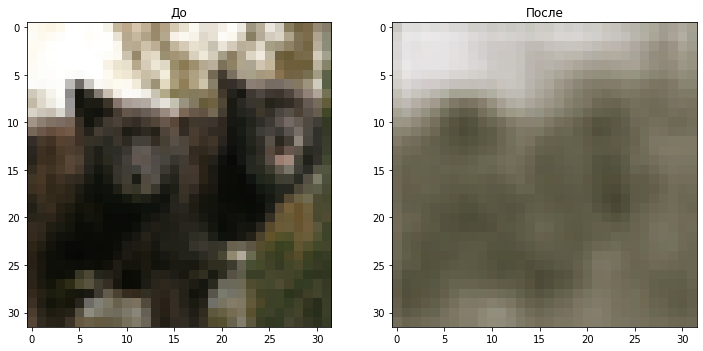

In [0]:
show_img(vae32, img, to_img)

In [0]:
%%time
train(vae, optimizer, wolfs, path, device, 4500)
show_img(vae, path)

tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0140, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward

KeyboardInterrupt: ignored

In [0]:
%%time
train(vae, optimizer, wolfs, path, device, 3700)
show_img(vae, path)

In [0]:
%%time
train(vae, optimizer, wolfs, path, device, 1500)